# Libraries

In [1]:
import requests

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns



pd.set_option('display.max_columns', None) # display all columns in DF

# Import data

In [2]:
df = pd.read_csv('output_regression.csv', sep = '~')

# Antal konkurrenter vs. prisen 

# Specific drug figure

In [4]:
df_figure = df.loc[df['unique_id'] == 'olanzapine-tablet-oral']

In [5]:
df_figure = df_figure.groupby(['date', 'generic_name', 'labeler_name'])['price_per_unit_adj'].mean()
df_figure = df_figure.reset_index()
df_figure['ln_price_per_unit_adj'] = np.log(df_figure['price_per_unit_adj'])

In [6]:
df_figure

,date,generic_name,labeler_name,price_per_unit_adj,ln_price_per_unit_adj
0,2012-04-01,Olanzapine,Aurobindo Pharma Limited,7.914655,2.068716
1,2012-07-01,Olanzapine,Aurobindo Pharma Limited,4.895406,1.588297
2,2012-10-01,Olanzapine,Aurobindo Pharma Limited,2.743707,1.009310
3,2013-01-01,Olanzapine,Aurobindo Pharma Limited,2.554356,0.937800
4,2013-04-01,Olanzapine,Aurobindo Pharma Limited,1.862367,0.621848
5,2013-07-01,Olanzapine,Aurobindo Pharma Limited,2.189537,0.783690
6,2013-10-01,Olanzapine,Aurobindo Pharma Limited,2.528542,0.927643
7,2014-01-01,Olanzapine,Aurobindo Pharma Limited,2.382020,0.867949
8,2014-04-01,Olanzapine,Aurobindo Pharma Limited,2.242669,0.807667
9,2014-07-01,Olanzapine,Aurobindo Pharma Limited,1.717096,0.540634


[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Price Per Unit Adj. for Inflation'),
 Text(0.5, 1.0, 'Olanzapine')]

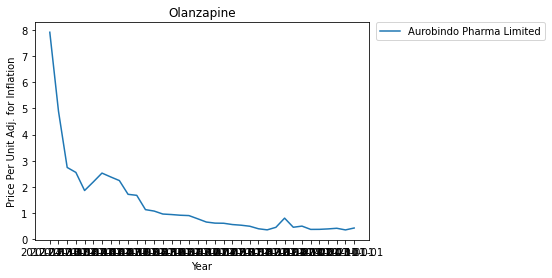

In [7]:
p = sns.lineplot(data = df_figure, x = 'date', y = 'price_per_unit_adj', hue = 'labeler_name', ci = 0)
plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
p.set(xlabel = 'Year', ylabel = 'Price Per Unit Adj. for Inflation', title = df_figure['generic_name'][0])

In [9]:
df_figure.to_excel('output_for_one_drug.xlsx', index = False)